In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("D:/Code/Hà Tuấn Duy/notebooks/fake_job_postings.csv")
df.index = range(1, len(df) + 1)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
1,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 1 to 17880
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Kiểm tra và xử lí dữ liệu bị thiếu

In [6]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [32]:
df['location'].fillna('Unknown', inplace=True)
df['department'].fillna('Unknown', inplace=True)
df['salary_range'].fillna('Not Specified', inplace=True)
df['company_profile'].fillna('', inplace=True)
df['description'].fillna('', inplace=True)
df['requirements'].fillna('', inplace=True)
df['benefits'].fillna('', inplace=True)
df['employment_type'].fillna('Not Specified', inplace=True)
df['required_experience'].fillna('Not Specified', inplace=True)
df['required_education'].fillna('Not Specified', inplace=True)
df['industry'].fillna('Not Specified', inplace=True)
df['function'].fillna('Not Specified', inplace=True)

print(df.isna().sum())

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


## Kiểm tra dữ liệu trùng lặp

In [33]:
df.duplicated().sum()

0

Bộ dữ liệu này không có dữ liệu bị trùng lặp

In [34]:
print("Thống kê mô tả cho các cột dữ liệu số:")
print(df.describe())

categorical_cols = ['title', 'location', 'department', 'salary_range', 'employment_type', 
                    'required_experience', 'required_education', 'industry', 'function']
for col in categorical_cols:
    print(f"\n{col} - Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head(10))

Thống kê mô tả cho các cột dữ liệu số:
             job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

title - Unique values: 11231
title
English Teacher Abroad                                311
Customer Service Associate   

Phân bố các tin tuyển dụng giả:
 fraudulent
0    17014
1      866
Name: count, dtype: int64

Percentage:
 fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_18476\3138465016.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=df, palette=['blue', 'red'])


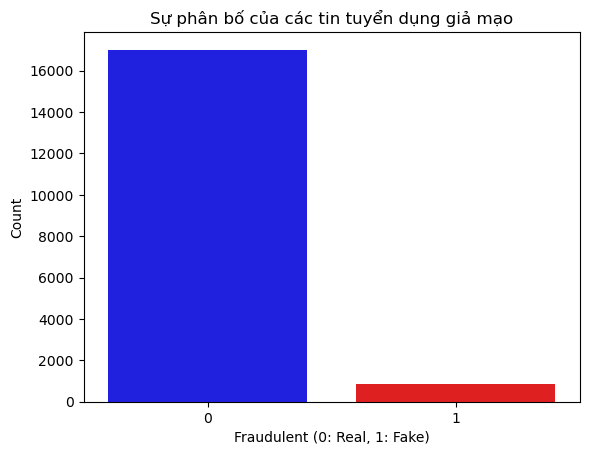

In [37]:
fraud_counts = df['fraudulent'].value_counts()
fraud_percent = df['fraudulent'].value_counts(normalize=True) * 100
print("Phân bố các tin tuyển dụng giả:\n", fraud_counts)
print("\nPercentage:\n", fraud_percent)

sns.countplot(x='fraudulent', data=df)
sns.countplot(x='fraudulent', data=df, palette=['blue', 'red'])
plt.title('Sự phân bố của các tin tuyển dụng giả mạo')
plt.xlabel('Fraudulent (0: Real, 1: Fake)')
plt.ylabel('Count')
plt.show()

## Biểu đồ cột trực quan hóa cho thấy sự chênh lệch cực lớn:
Lừa đảo = 0 (tin tuyển dụng thật): 17.014 tin (chiếm 95,15%), đại diện cho phần lớn các tin tuyển dụng là thật.

Lừa đảo = 1 (tin tuyển dụng giả): 866 tin (chiếm 4.84%), đại diện cho chỉ một phần nhỏ các tin tuyển dụng là giả mạo.

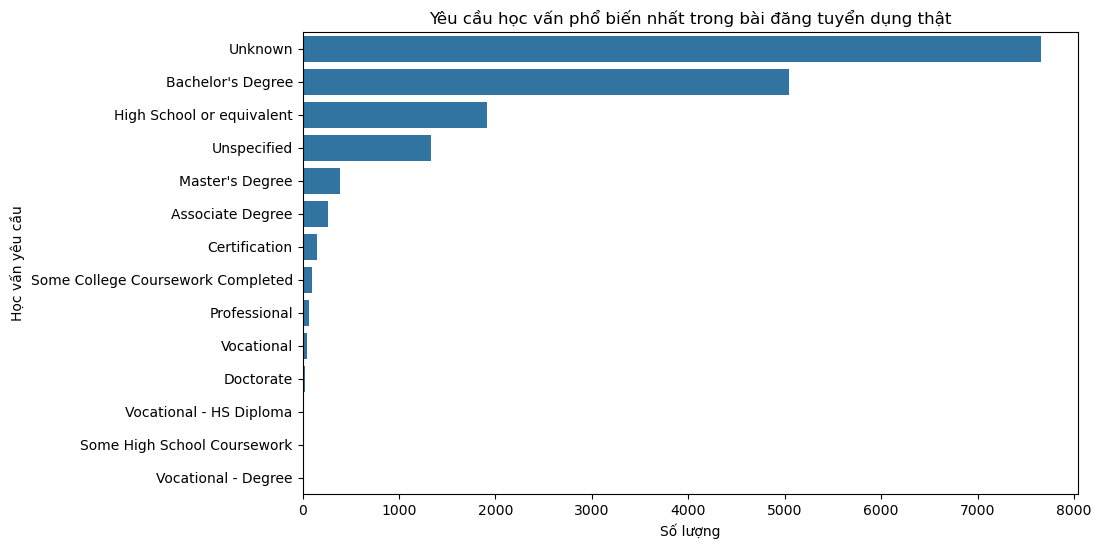

In [44]:
df_non_fraud = df[df['fraudulent'] == 0]

plt.figure(figsize=(10, 6))
sns.countplot(y='required_education', data=df_non_fraud, order=df_non_fraud['required_education'].value_counts().index)
plt.title('Yêu cầu học vấn phổ biến nhất trong bài đăng tuyển dụng thật')
plt.xlabel('Số lượng')
plt.ylabel('Học vấn yêu cầu')
plt.show()

## Dựa vào biểu đồ, ta có thể thấy 
Mức độ phổ biến nhất: Unknown
- Điều này cho thấy khoảng hơn 7500 bài đăng không yêu cầu mức độ học vấn 

Tiếp sau đó là bằng cử nhân: Bachelor's Degree
- Có thể thấy nhiều công việc yêu cầu đến trình độ đại học 

High School or equivalent và Unspecified: chiếm mức trung bình (khoảng 1500 – 1300 bài).

Các mức học vấn cao hơn như Master's Degree, Doctorate, hoặc các chứng chỉ chuyên môn chiếm số lượng rất nhỏ.